In [1]:
#Modules for executing steps of Notebook
import acquire
import explore

In [2]:
#Plotting libraries
import warnings
import matplotlib as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from pylab import rcParams

#Style-settings for Notebook
rcParams['figure.figsize'] = 18, 8
plt.style.use('fivethirtyeight')

In [3]:
#Statistic tools for plots and for scoring
import statsmodels.api as sm

## ACQUIRE/PREP

Acquire the data from the online source at https://ds.codeup.com/fitbit-data.tar.gz

In [4]:
df = acquire.get_data()

In [ ]:
df.sort_values('Date')

Df2 is the prepared data, with no nulls and with all dtypes are numerical

In [5]:
df2 = acquire.clean_data(df)

Calories Burned
Steps
Minutes Sedentary
Activity Calories


,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2018-12-02,3957.0,13257.0,6.23,195,725.0,265,13,70,2305.0
2018-12-03,3660.0,12915.0,6.12,6,782.0,219,40,51,1993.0
2018-12-04,3384.0,13763.0,6.49,13,608.0,199,11,67,1663.0
2018-12-05,3670.0,13865.0,6.52,12,739.0,200,12,69,1968.0
2018-12-06,3669.0,14774.0,6.96,9,647.0,198,4,78,1962.0


Scaled DataFrame if need be

In [8]:
scaled_df = acquire.scale_data(df2)

scaled_df = scaled_df.set_index(df2.index)

# EXPLORE

## Regular-sized data

#### Bird's Eye View of the Dataset

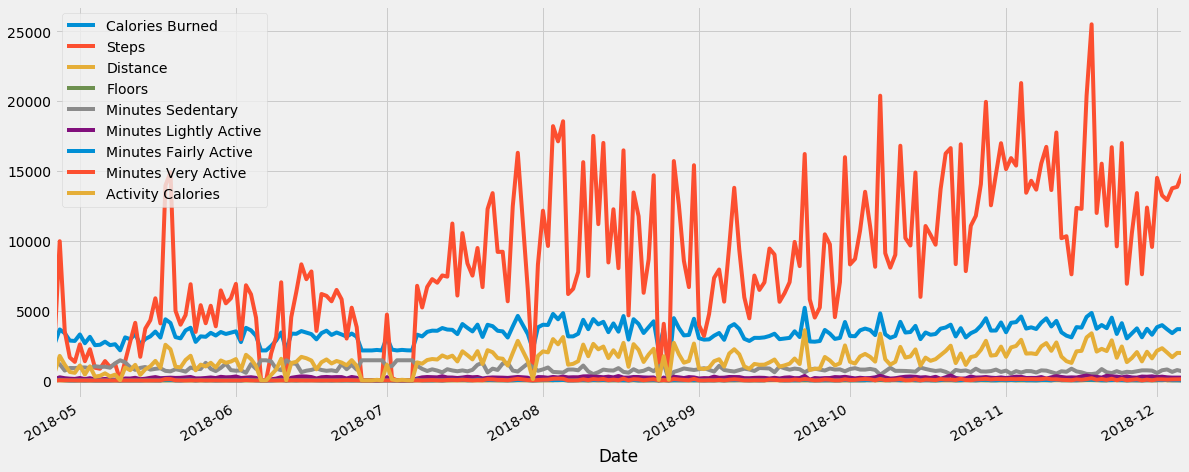

In [9]:
df2.plot()

#### Bird's Eye View of the Dataset

#### With scaled data

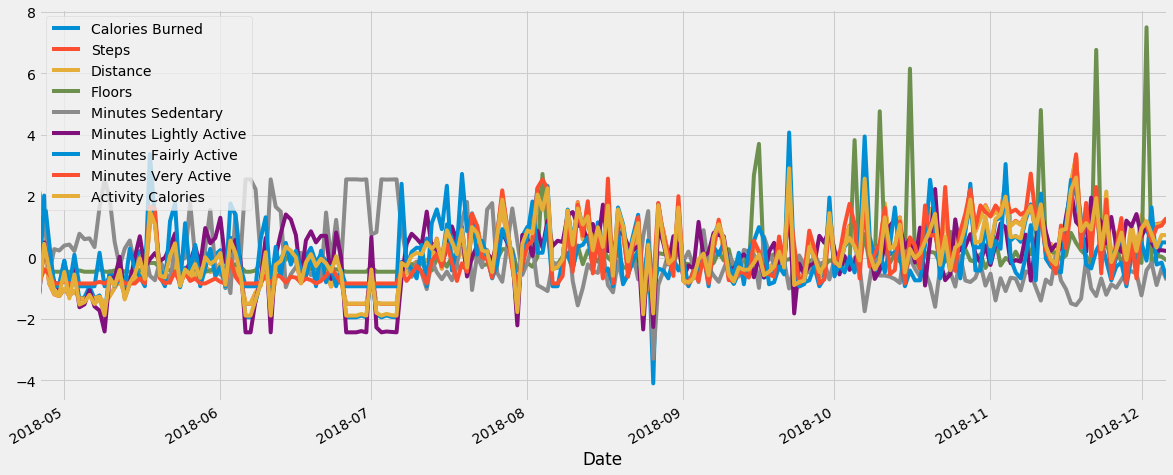

In [10]:
scaled_df.plot()

The day of the murder!

In [13]:
day_of_murder = scaled_df[scaled_df['Calories Burned'] == scaled_df['Calories Burned'].min()]

In [14]:
pre_murder = df2[:'2018-08-26']

In [15]:
post_murder = df2['2018-08-26':]

In [21]:
pre_murder.describe()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
count,153.000000,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,3221.928105,5681.45098,2.679739,4.686275,906.470588,163.313725,13.117647,17.470588,1180.627451
std,656.656444,4576.46211,2.158928,8.057744,267.236542,80.778243,15.177867,30.303521,739.304713
min,799.000000,0.00000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000
25%,2825.000000,1929.00000,0.910000,0.000000,714.000000,119.000000,0.000000,0.000000,602.000000
50%,3275.000000,4986.00000,2.350000,2.000000,839.000000,183.000000,9.000000,3.000000,1127.000000
75%,3581.000000,7504.00000,3.540000,6.000000,1050.000000,222.000000,21.000000,17.000000,1627.000000
max,4818.000000,18565.00000,8.760000,78.000000,1440.000000,311.000000,67.000000,125.000000,3106.000000


In [22]:
post_murder.describe()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,3543.902913,11307.456311,5.378155,21.067961,695.330097,208.398058,16.572816,50.553398,1755.854369
std,580.780788,4502.931287,2.165243,35.262673,137.567266,57.587843,16.082875,36.483875,640.718720
min,799.000000,207.000000,0.100000,1.000000,28.000000,13.000000,0.000000,0.000000,51.000000
25%,3155.500000,8009.500000,3.825000,7.000000,620.000000,167.500000,6.500000,14.000000,1276.500000
50%,3517.000000,10729.000000,5.160000,11.000000,698.000000,209.000000,12.000000,48.000000,1689.000000
75%,3822.000000,14642.000000,7.005000,16.000000,781.500000,249.000000,20.500000,79.000000,2114.500000
max,5199.000000,25512.000000,12.000000,195.000000,1040.000000,349.000000,78.000000,154.000000,3596.000000


# FORECASTING